Gutes Notebook hier: https://www.kaggle.com/code/vatsalmavani/music-recommendation-system-using-spotify-dataset/notebook#Building-Music-Recommendation-System-using-Spotify-Dataset

In [1]:
# Import dependencies
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

In [2]:
# Load data
## Download here https://www.kaggle.com/datasets/gauthamvijayaraj/spotify-tracks-dataset-updated-every-week
## And put into ../data folder
data = pd.read_csv("../data/spotify_tracks.csv")
# Feature Names
# track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,
# duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,
# valence,track_url,language


In [3]:
# Filter X
# complete_X = data[['instrumentalness', 'speechiness']]
complete_X = data[['instrumentalness', 'danceability']]
X = complete_X.to_numpy()[:2000]
X_1 = X[:,0]
X_2 = X[:,1]

In [4]:
# Create y
y = np.zeros(shape=X.shape[0]) 
y[np.logical_or(X_1 > 0.8, X_2 > 0.6)] = 1
print(f'Num likes:{int(np.sum(y))} / {y.shape[0]}')


Num likes:1330 / 2000


In [5]:
# # Preprocess data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Apply noise
noise_idx = np.random.choice(len(y), size=int(0.1*len(y)), replace=False)
y[noise_idx] = 1 - y[noise_idx]
print(f'Num likes:{int(np.sum(y))} / {y.shape[0]}')

# Split the data
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Num likes:1264 / 2000


In [6]:
# Train a Support Vector Machine classifier
clf_optimal = SVC(kernel='rbf', C=10000,  random_state=42)
clf_optimal.fit(X_train, y_train)

# Overfit
clf_overfit = SVC(kernel='rbf', C=1000000, gamma='scale', random_state=42)
clf_overfit.fit(X_train, y_train)

# Underfit
clf_underfit = SVC(kernel='rbf', C=1, random_state=42)
clf_underfit.fit(X_train, y_train)

SVC(C=1, random_state=42)

Underfitting Accuracy: 0.878


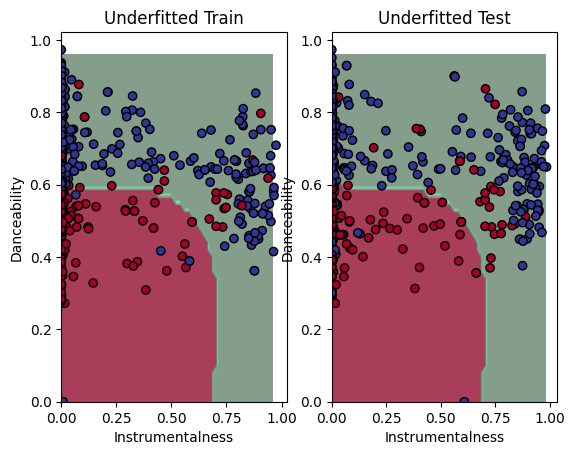

Middle Accuracy: 0.88


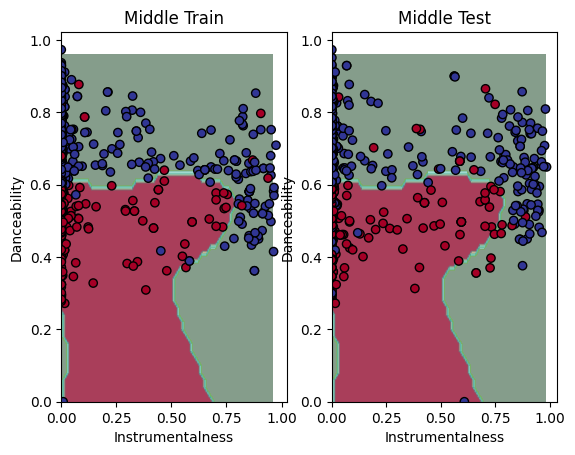

Overfitting Accuracy: 0.872


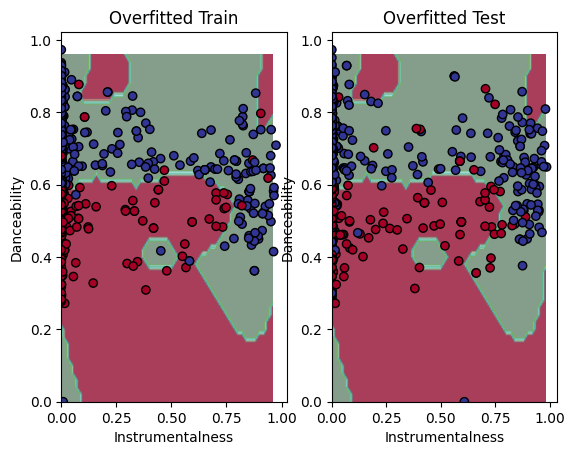

In [8]:
## Plot Prediction

def plot_pred(classifier, X, y, title:str):
    # Create a mesh grid
    # x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    # y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    # xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
    #                    np.linspace(y_min, y_max, 100))
    
    # Predict on the mesh grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    # plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
    
    plt.title(title)
    # TODO Make dynamic
    plt.xlabel('Instrumentalness')
    plt.ylabel('Danceability')


# plot_pred(X, y, clf_optimal, 'Optimal Classifier')
# plot_pred(X, y, clf_overfit, 'Overfit Classifier')
# plot_pred(X, y, clf_underfit, 'Underfit Classifier')

y_pred_underfit = clf_underfit.predict(X_test)
print(f'Underfitting Accuracy: {accuracy_score(y_test, y_pred_underfit)}')
# plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_pred(clf_underfit, X_train, y_train, 'Underfitted Train')
plt.subplot(1, 2, 2)
plot_pred(clf_underfit, X_test, y_test, 'Underfitted Test')
plt.show()


clf_optimal.fit(X_train, y_train)
y_pred_optimal = clf_optimal.predict(X_test)
print(f'Middle Accuracy: {accuracy_score(y_test, y_pred_optimal)}')
plt.subplot(1, 2, 1)
plot_pred(clf_optimal, X_train, y_train, 'Middle Train')
plt.subplot(1, 2, 2)
plot_pred(clf_optimal, X_test, y_test, 'Middle Test')
plt.show()


# Overfitting example: Deep network with too many neurons
clf_overfit.fit(X_train, y_train)
y_pred_overfit = clf_overfit.predict(X_test)
print(f'Overfitting Accuracy: {accuracy_score(y_test, y_pred_overfit)}')
plt.subplot(1, 2, 1)
plot_pred(clf_overfit, X_train, y_train, 'Overfitted Train')
plt.subplot(1, 2, 2)
plot_pred(clf_overfit, X_test, y_test, 'Overfitted Test')
plt.show()